# Support Vector Machines

## Preparation

### Imports

In [1]:
import numpy as np
import pandas as pd

import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
from sklearn.model_selection import (
    train_test_split,
    cross_val_score, 
    GridSearchCV, 
    validation_curve,
)
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler,
)
from sklearn.svm import (
    LinearSVC, 
    SVC,
)
from sklearn.ensemble import (
    ExtraTreesClassifier, 
    AdaBoostClassifier, 
    BaggingClassifier,
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline  

### Loading data

In [2]:
data_path = '../preprocessing/preprocessed.csv'
data = pd.read_csv(data_path)

# Separate features and target variable
X = data.drop('price_category', axis=1)
y = data['price_category']

### Train/test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Normalization and standarization

In [4]:
scaler = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)

# Apply the normalization trained in training data in both training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Evaluation

In [5]:
def plot_evaluation_metrics(true_y, predicted_y):
    # 1. Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(true_y, predicted_y)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix - Best Model')
    plt.ylabel('True value')
    plt.xlabel('Predicted value')
    plt.show()

    # 2. Classification metrics
    report = classification_report(true_y, predicted_y, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics_df[['precision', 'recall', 'f1-score']], 
                annot=True, 
                cmap='YlOrRd', 
                fmt='.2f')
    plt.title('Classification metrics - Best Model')
    plt.show()

## Linear Kernel

### Default values

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

plot_evaluation_metrics(true_y=y_test, predicted_y=prediction)

### Parameter tuning

/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mique

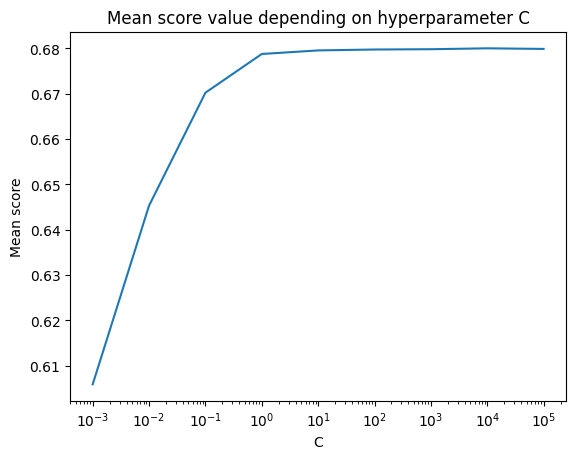

Best C parameter found:  {'C': np.float64(10000.0)}


/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/mique

Acc. 10-fold cross on train data=  0.6799840774924167


/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/miquelrodoreda/miniconda3/envs/md/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


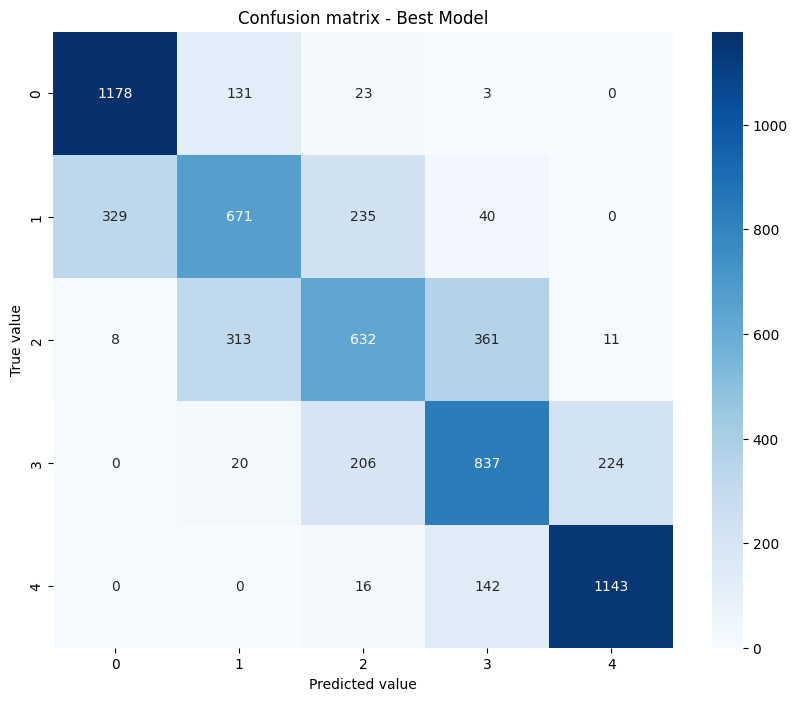

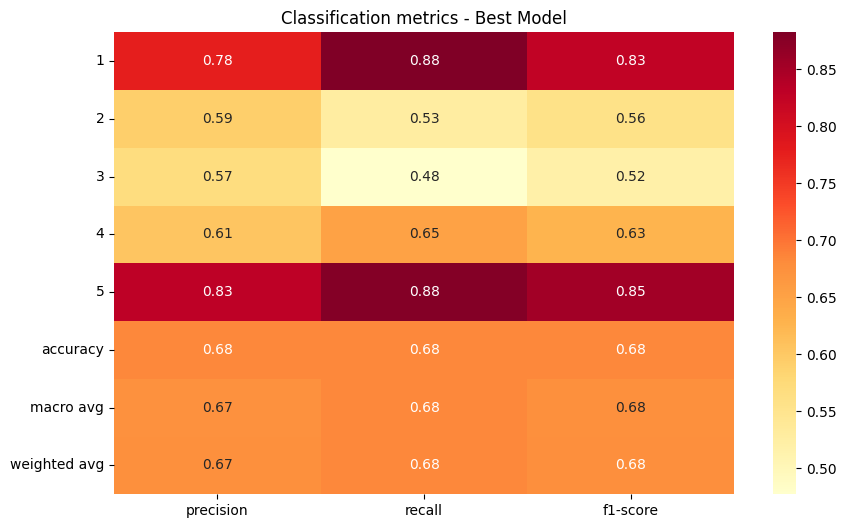

In [12]:
# List of Cs to test, ranging from 10^-3 to 10^5
Cs = np.logspace(-3, 5, num = 9, base = 10.0)

param_grid = {"C": Cs}
grid_search = GridSearchCV(
    LinearSVC(), 
    param_grid, 
    cv = 10,
    n_jobs = -1
)
grid_search.fit(X_train, y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_["mean_test_score"]
plt.title("Mean score value depending on hyperparameter C")
plt.xlabel("C")
plt.ylabel("Mean score")
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
print("Best C parameter found: ", parval)

cvacc = cross_val_score(
    LinearSVC(C=parval['C']),
    X=X_train,
    y=y_train,
    cv=10,
    scoring='accuracy'
)
print('Acc. 10-fold cross on train data= ', cvacc.mean())

# Let's apply the best C parameter found to the test set
knc = LinearSVC(C = parval["C"])
knc.fit(X_train, y_train)
prediction = knc.predict(X_test)

plot_evaluation_metrics(true_y=y_test, predicted_y=prediction)

## Polynomial Kernel

### Default values

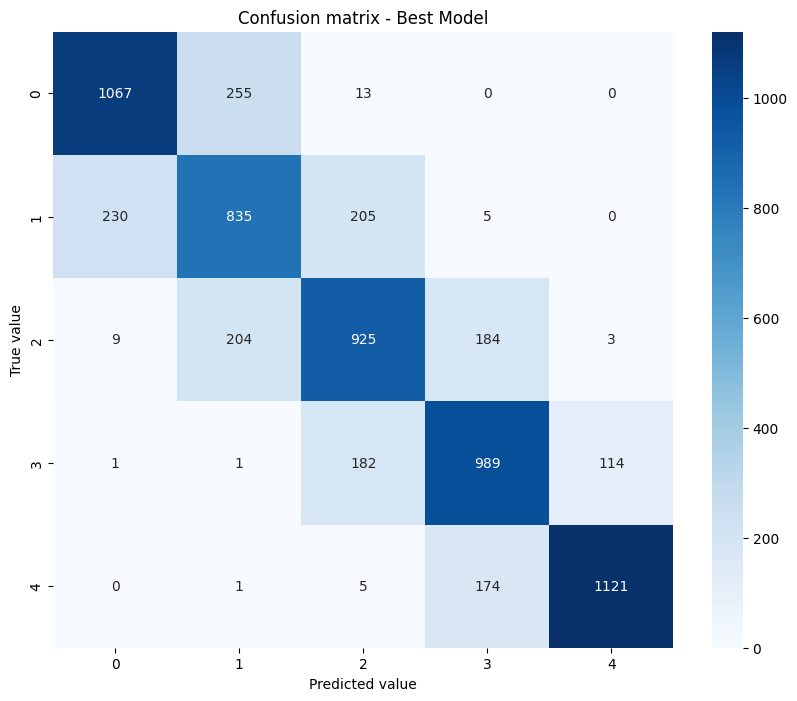

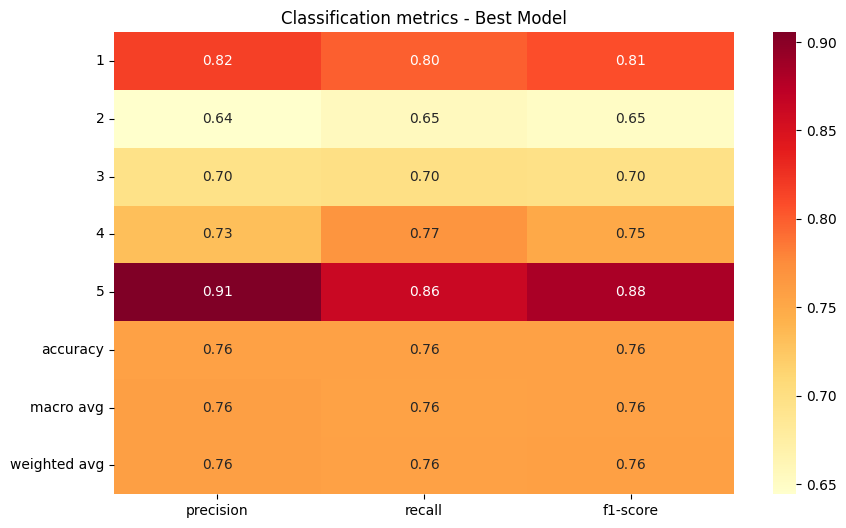

In [6]:
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

plot_evaluation_metrics(true_y=y_test, predicted_y=prediction)

### Parameter tuning

#### Degree = 2

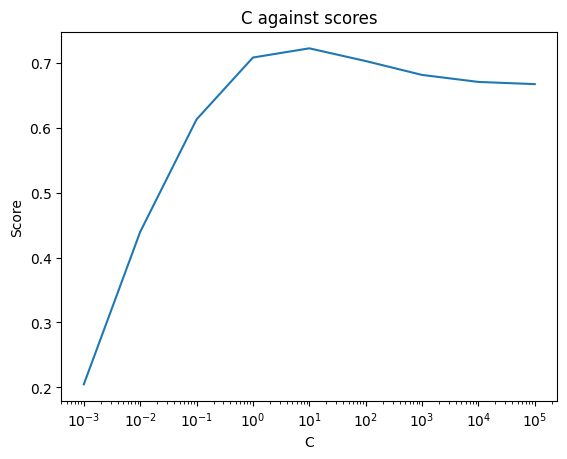

Best C parameter found:  {'C': np.float64(10.0)}
Acc. 10-fold cross on train data=  0.7602828469754579


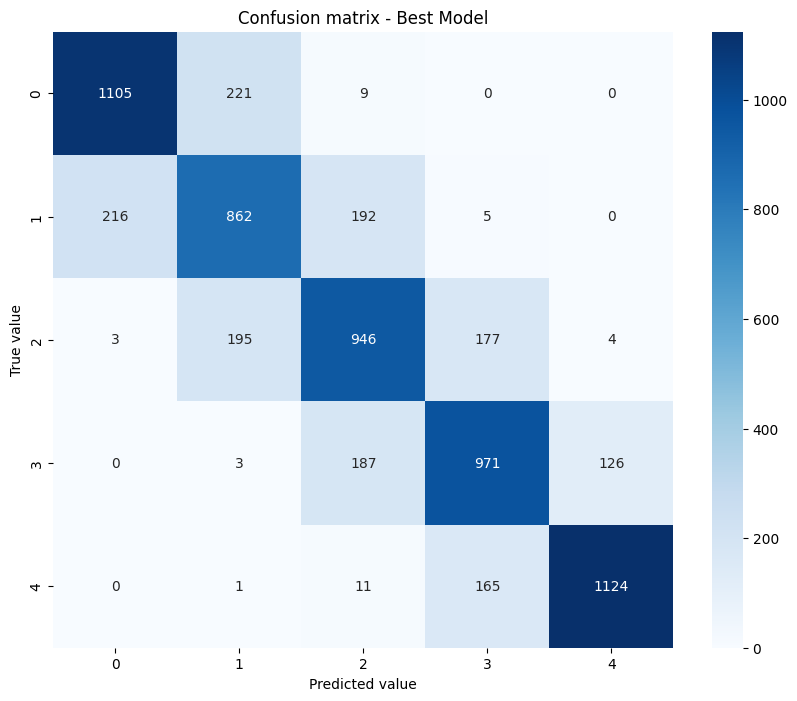

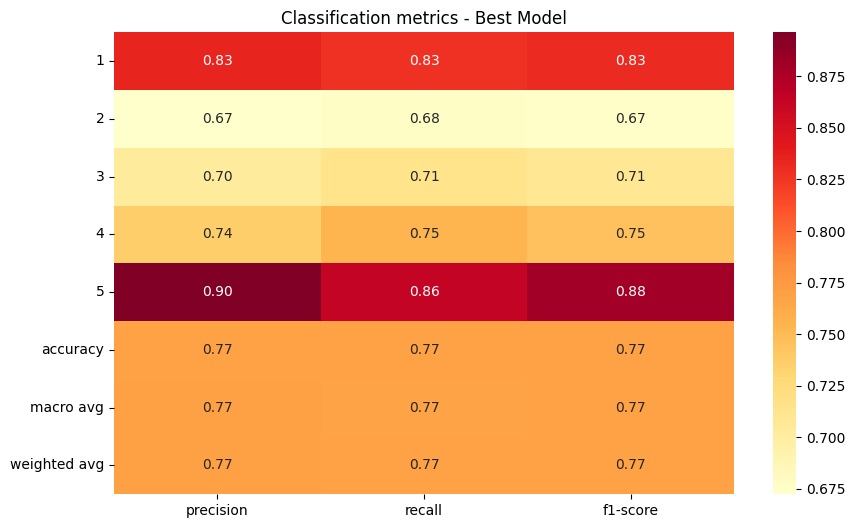

In [7]:
Cs = np.logspace(-3, 5, num = 9, base = 10.0)

param_grid = {"C": Cs}
grid_search = GridSearchCV(
    SVC(kernel = "poly",degree = 2), 
    param_grid, 
    cv = 10
)

X_subsample, _, y_subsample, _ = train_test_split(
    X_train, y_train, train_size=5000, stratify=y_train, random_state=42)

#grid_search.fit(X_train, y_train)
grid_search.fit(X_subsample, y_subsample)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs, scores)
plt.title("C against scores")
plt.xlabel("C")
plt.ylabel("Score")
plt.show()

parval = grid_search.best_params_
print("Best C parameter found: ", parval)

cvacc = cross_val_score(
    SVC(kernel='poly',degree =2,C=parval['C']),
    X=X_train,
    y=y_train,
    cv=10,
    scoring='accuracy'
)
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly', degree=2, C=parval['C']) 
knc.fit(X_train, y_train)
prediction =knc.predict(X_test)

plot_evaluation_metrics(true_y=y_test, predicted_y=prediction)

## RBF Kernel